In [2]:
import torch
import numpy as np
from utils import prediction,normalization,discrete_missing,continuous_missing,calculate_missing_ratio,get_pseudo_color_img
import time
import matplotlib.pyplot as plt
import random
from skimage.metrics import structural_similarity,peak_signal_noise_ratio
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
assert device.type!='cpu' # Only GPU inference supported currently

Loading models and data

In [3]:
model = torch.jit.load('network/MDA_GAN.pt').to(device).half()
data = normalization(np.load('data/F3_salt.npy'))
print('Data shape is', data.shape)

Data shape is (128, 384, 384)


iline random discrete missing proportion: 50.0%
xline random discrete missing proportion: 50.0%
The total missing proportion: 74.47645664215088%
The SSIM metric is: 0.9141208105674492
The PSNR metric is: 31.101343256953662


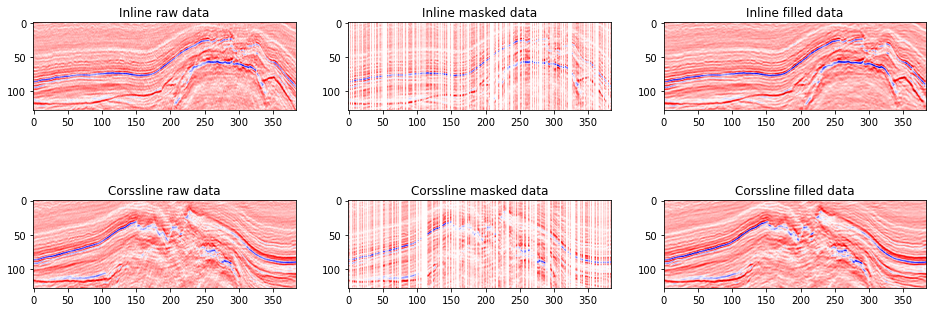

In [15]:
mask = discrete_missing(data, proportions=(0.5,0.5), directions=('iline','xline'),show_slices= (16,16))
print('The total missing proportion:',f'{calculate_missing_ratio(mask)*100}%')

masked_data = data * mask  + (1 - mask) * 0.5
filled_data = prediction(model,masked_data,device)
print('The SSIM metric is:', structural_similarity(data, filled_data))
print('The PSNR metric is:', peak_signal_noise_ratio(data, filled_data))
show_slice = 16
org_iline_slice = data[:,show_slice,:]
masked_iline_slice = masked_data[:,show_slice,:]
filled_iline_slice = filled_data[:,show_slice,:]

plt.figure(figsize=(16,6))
org_slice, masked_slice, filled_slice = get_pseudo_color_img(org_iline_slice, masked_iline_slice, filled_iline_slice)
plt.subplot(2,3,1)
plt.title('Inline raw data')
plt.imshow(org_slice)
plt.subplot(2,3,2)
plt.title('Inline masked data')
plt.imshow(masked_slice)
plt.subplot(2,3,3)
plt.title('Inline filled data')
plt.imshow(filled_slice)

show_slice = 16
org_xline_slice = data[:,:,show_slice]
masked_xline_slice = masked_data[:,:,show_slice]
filled_xline_slice = filled_data[:,:,show_slice]
org_slice, masked_slice, filled_slice = get_pseudo_color_img(org_xline_slice, masked_xline_slice, filled_xline_slice)

plt.subplot(2,3,4)
plt.title('Corssline raw data')
plt.imshow(org_slice)
plt.subplot(2,3,5)
plt.title('Corssline masked data')
plt.imshow(masked_slice)
plt.subplot(2,3,6)
plt.title('Corssline filled data')
plt.imshow(filled_slice)

iline random discrete missing proportion: 75.0%
xline random discrete missing proportion: 75.0%
The total missing proportion: 93.486887216568%
The SSIM metric is: 0.8412626367474029
The PSNR metric is: 27.741722997044644


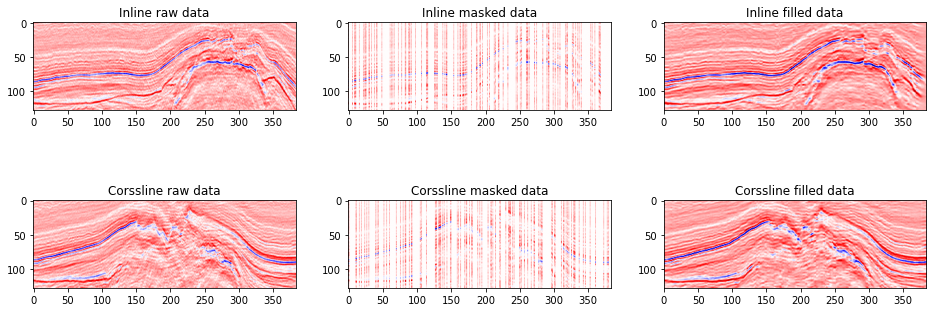

In [16]:
mask = discrete_missing(data, proportions=(0.75,0.75), directions=('iline','xline'),show_slices= (16,16))
print('The total missing proportion:',f'{calculate_missing_ratio(mask)*100}%')

masked_data = data * mask  + (1 - mask) * 0.5
filled_data = prediction(model,masked_data,device)
print('The SSIM metric is:', structural_similarity(data, filled_data))
print('The PSNR metric is:', peak_signal_noise_ratio(data, filled_data))
show_slice = 16
org_iline_slice = data[:,show_slice,:]
masked_iline_slice = masked_data[:,show_slice,:]
filled_iline_slice = filled_data[:,show_slice,:]

plt.figure(figsize=(16,6))
org_slice, masked_slice, filled_slice = get_pseudo_color_img(org_iline_slice, masked_iline_slice, filled_iline_slice)
plt.subplot(2,3,1)
plt.title('Inline raw data')
plt.imshow(org_slice)
plt.subplot(2,3,2)
plt.title('Inline masked data')
plt.imshow(masked_slice)
plt.subplot(2,3,3)
plt.title('Inline filled data')
plt.imshow(filled_slice)

show_slice = 16
org_xline_slice = data[:,:,show_slice]
masked_xline_slice = masked_data[:,:,show_slice]
filled_xline_slice = filled_data[:,:,show_slice]
org_slice, masked_slice, filled_slice = get_pseudo_color_img(org_xline_slice, masked_xline_slice, filled_xline_slice)

plt.subplot(2,3,4)
plt.title('Corssline raw data')
plt.imshow(org_slice)
plt.subplot(2,3,5)
plt.title('Corssline masked data')
plt.imshow(masked_slice)
plt.subplot(2,3,6)
plt.title('Corssline filled data')
plt.imshow(filled_slice)